<a href="https://colab.research.google.com/github/OlajideFemi/Carbon-Footprint/blob/main/Another_copy_of_Energy_Consumption_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Energy Consumption Forecasting

<p><b>Problem Statement</b></p>

The objective is to forecast electricity demand over future time periods in order to support operational planning, cost control, and infrastructure resilience.
Accurate demand forecasting is critical because electricity systems must balance supply and demand in real time. Over- or under-estimation can result in service disruption, increased costs, or system instability.


In [ ]:
import pandas as pd

# Load demand
#demand = pd.read_csv("historic_demand_2009_2024.csv", parse_dates=["timestamp"])
# Load demand
demand = pd.read_csv("historic_demand_2009_2024.csv")

# Load weather
#weather = pd.read_csv("uk_weather.csv", parse_dates=["date"])

# Load weather
#weather = pd.read_csv("uk_weather.csv", parse_dates=["date"])


In [ ]:
demand.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,greenlink_flow,is_holiday
0,0,2009-01-01,1,37910,38704,33939,54,1403,0.0,0.0,...,0.0,-161.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,2009-01-01,2,38047,38964,34072,53,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2,2009-01-01,3,37380,38651,33615,53,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,3,2009-01-01,4,36426,37775,32526,50,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,2009-01-01,5,35687,37298,31877,50,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
demand.dtypes

,0
Unnamed: 0,int64
settlement_date,object
settlement_period,int64
nd,int64
tsd,int64
england_wales_demand,int64
embedded_wind_generation,int64
embedded_wind_capacity,int64
embedded_solar_generation,float64
embedded_solar_capacity,float64


In [ ]:
demand.shape

(251218, 24)

In [ ]:
demand.describe()

,Unnamed: 0,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,greenlink_flow,is_holiday
count,251218.0000,251218.000000,251218.000000,251218.000000,251218.000000,251218.000000,251218.000000,251217.000000,251217.000000,251217.000000,...,251217.000000,251217.000000,251217.000000,251217.000000,75921.000000,75921.000000,5793.000000,5793.0,0.0,251217.000000
mean,125608.5000,24.499180,31821.016918,33207.693780,28946.987863,1211.807673,4212.647700,796.906332,7810.549035,7.397127,...,542.987071,-107.993444,-25.274802,151.291620,187.524782,-51.635055,2089.604350,0.0,NaN,0.022877
std,72520.5343,13.853468,7768.569564,7697.897556,7043.277343,925.479143,1925.667757,1594.926927,5541.149436,41.211838,...,507.313822,223.132768,250.882270,387.974761,491.876372,364.936104,1808.477656,0.0,NaN,0.149510
min,0.0000,1.000000,13367.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,-24.000000,...,-1215.000000,-505.000000,-585.000000,-1022.000000,-1455.000000,-1028.000000,-1861.000000,0.0,NaN,0.000000
25%,62804.2500,12.000000,25610.000000,27229.000000,23290.000000,520.000000,2085.000000,0.000000,1820.000000,0.000000,...,0.000000,-251.000000,-127.000000,0.000000,0.000000,0.000000,676.000000,0.0,NaN,0.000000
50%,125608.5000,24.000000,31255.000000,32453.000000,28412.500000,971.000000,4152.000000,0.000000,9300.000000,0.000000,...,766.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,1975.000000,0.0,NaN,0.000000
75%,188412.7500,36.000000,37529.000000,38681.000000,34166.000000,1648.000000,6231.000000,732.000000,13080.000000,0.000000,...,994.000000,45.000000,5.000000,0.000000,401.000000,0.000000,3324.000000,0.0,NaN,0.000000
max,251217.0000,50.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9830.000000,15407.000000,893.000000,...,1143.000000,499.000000,504.000000,1033.000000,1401.000000,1002.000000,6238.000000,0.0,NaN,1.000000


In [ ]:
import pandas as pd

demand["settlement_date"] = pd.to_datetime(demand["settlement_date"])

demand["timestamp"] = (
    demand["settlement_date"]
    + pd.to_timedelta((demand["settlement_period"] - 1) * 30, unit="min")
)

demand = demand.set_index("timestamp").sort_index()


<Axes: xlabel='timestamp'>

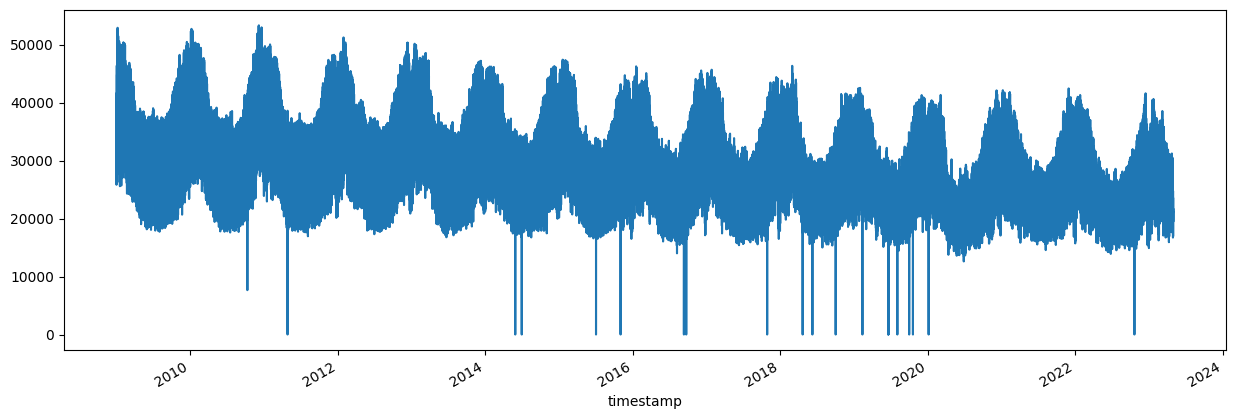

In [ ]:
demand["england_wales_demand"].plot(figsize=(15,5))


In [11]:
demand["england_wales_demand"].describe()


,england_wales_demand
count,251218.000000
mean,28946.987863
std,7043.277343
min,0.000000
25%,23290.000000
50%,28412.500000
75%,34166.000000
max,53325.000000


In [12]:
demand["bad_reading"] = demand["england_wales_demand"] < 10000


In [13]:
demand[demand["bad_reading"]]["england_wales_demand"].count()


np.int64(22)

In [14]:
demand.loc[demand["bad_reading"], "england_wales_demand"] = None
demand["england_wales_demand"] = demand["england_wales_demand"].interpolate(method="time")


<Axes: xlabel='timestamp'>

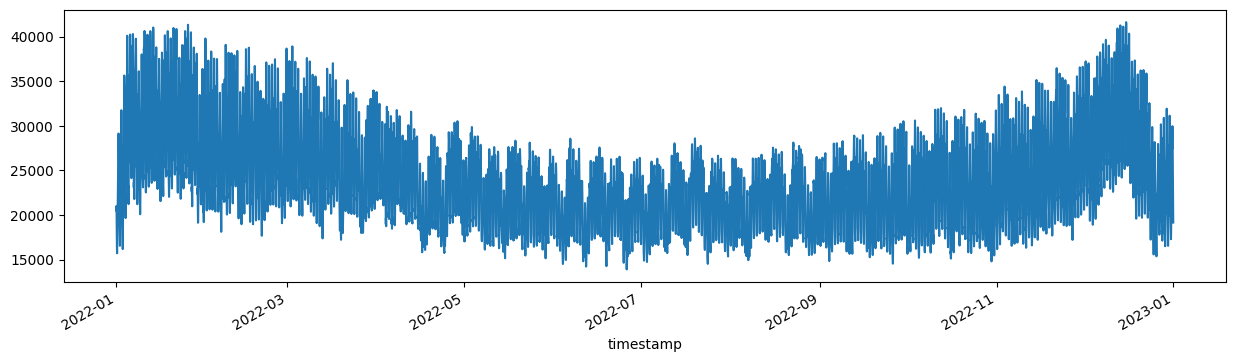

In [15]:
demand.loc["2022"]["england_wales_demand"].plot(figsize=(15,4))


<Axes: xlabel='hour'>

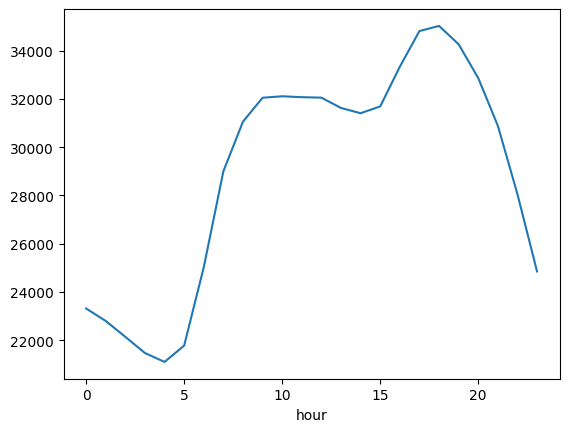

In [16]:
demand["hour"] = demand.index.hour

demand.groupby("hour")["england_wales_demand"].mean().plot()


<Axes: xlabel='timestamp'>

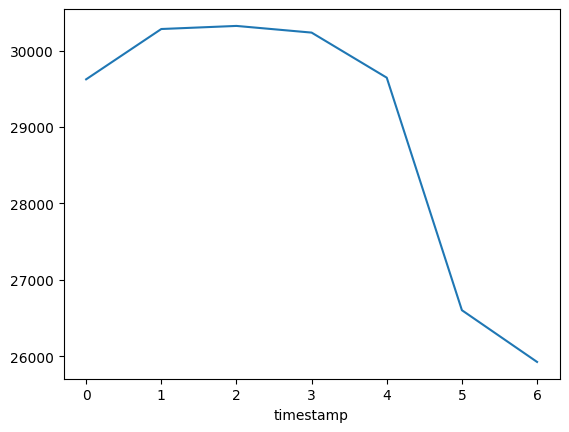

In [17]:
demand.groupby(demand.index.dayofweek)["england_wales_demand"].mean().plot()


<Axes: title={'center': 'england_wales_demand'}, xlabel='month'>

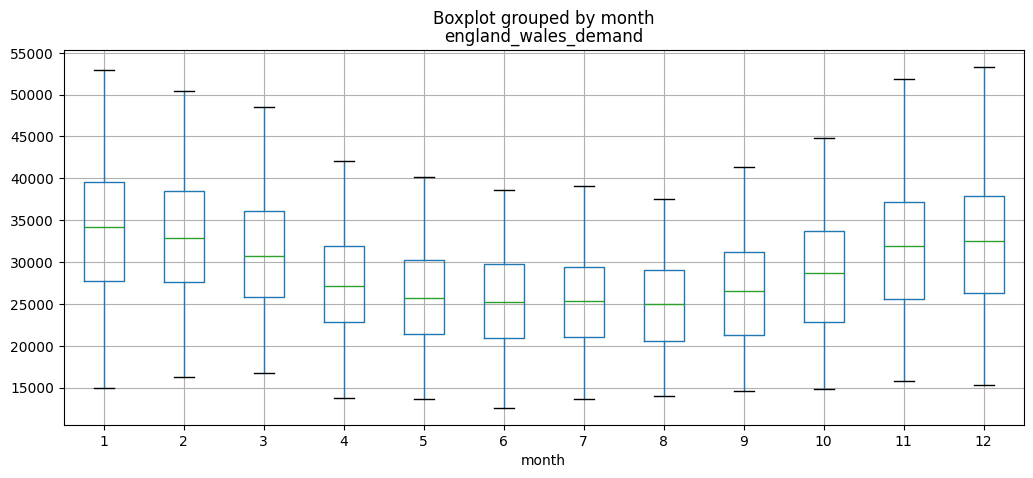

In [18]:
demand["month"] = demand.index.month

demand.boxplot(
    column="england_wales_demand",
    by="month",
    figsize=(12,5)
)
